In [1]:
import os
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white', {'xtick.bottom': True, 'ytick.left': True})
sns.set_context('notebook', font_scale=2)

In [2]:
# color scheme for figures
import visual_behavior.ophys.response_analysis.utilities as ut
colors = ut.get_colors_for_image_sets()

In [3]:
experiment_dir = '/media/brian/Seagate Portable Drive/brianhhu/data/visual_behavior_pilot_manuscript_initial_submission/'
model_dir = '/home/brian/data/stsp_final/noise_std_0.5_pos_weight_5_l2_pen_0.001_patience_5/RESULT/'

In [4]:
manifest = pd.read_csv(os.path.join(experiment_dir,'visual_behavior_data_manifest.csv'))

In [5]:
selected_data = manifest[(manifest.cre_line=='Slc17a7-IRES2-Cre')&  # Vip-IRES-Cre
                         (manifest.session_type=='behavior_session_A')] #&  # behavior_session_B, C, D
#                          (manifest.targeted_structure=='VISp')]  # VISp
selected_data

,experiment_id,experiment_container_id,targeted_structure,imaging_depth,cre_line,reporter_line,full_genotype,session_type,donor_id,specimen_id,experiment_date
8,639253368,639001089,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,334310,599659785,9/28/2017 14:14
12,661423848,661409179,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,355469,643316601,2/6/2018 15:03
16,670396087,670266085,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,355471,644831080,3/6/2018 13:37
28,692342909,692315205,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,369320,656813113,4/30/2018 16:09
40,729951441,729705760,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,382897,679238912,8/3/2018 10:11
44,715228642,715094648,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,384942,687987489,6/27/2018 13:08
48,720001924,719860866,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,384942,687987489,7/13/2018 14:33
52,719321260,719538773,VISal,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,385255,685152008,7/12/2018 10:27
64,754566180,754511300,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,401625,717693518,9/17/2018 15:13
84,768224465,768053094,VISp,175,Slc17a7-IRES2-Cre,Camk2a-tTA;Ai93,Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93,behavior_session_A,407486,739783701,10/24/2018 14:21


In [6]:
experiment_id = selected_data.experiment_id.values
experiment_id

array([639253368, 661423848, 670396087, 692342909, 729951441, 715228642,
       720001924, 719321260, 754566180, 768224465, 760696146, 774379465,
       673139359])

In [7]:
from visual_behavior.ophys.dataset.visual_behavior_ophys_dataset import VisualBehaviorOphysDataset
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis 

# Extract data from experiment

In [8]:
dataset= VisualBehaviorOphysDataset(experiment_id[7], cache_dir=experiment_dir)
analysis = ResponseAnalysis(dataset, use_events=False)

# get flash dataframe
fdf = analysis.flash_response_df

loading trial response dataframe
loading flash response dataframe
loading omitted flash response dataframe


In [9]:
fdf['change_time'] = fdf.start_time.values
fdf = pd.merge(fdf, dataset.all_trials[['change_time', 'initial_image_name', 'change_image_name', 'trial_type']],
                             on='change_time', how='left')

fdf_select = fdf[fdf.reward_rate>2]  # same as engaged==True
fdf_select = fdf_select[fdf_select.image_name!='omitted']  # don't use omitted images
# fdf_select = fdf_select[fdf_select.repeat<=10]  # limit to first 10 repeats
# fdf_select = fdf_select[(fdf_select.trial_type=='go')|(fdf_select.trial_type=='catch')]  # use only go/catch trials

num_cells = len(fdf_select.cell_specimen_id.unique())

# flash responses
cell_flash = fdf_select.mean_response.values.reshape(-1, num_cells) # num_trials x num_cells

# PCA

In [58]:
from sklearn.decomposition import PCA

In [59]:
dim_reduce = PCA(n_components=num_cells, whiten=True)  # whiten here?
dim_reduce.fit(cell_flash)
X_pca = dim_reduce.transform(cell_flash)

# use 95% variance cutoff threshold
variance_threshold = 0.95
num_components = np.argwhere(np.cumsum(dim_reduce.explained_variance_ratio_)>=variance_threshold)[0]

In [60]:
flash_df = fdf_select.loc[fdf_select.cell_specimen_id==fdf_select.cell_specimen_id.unique()[0], ['image_name', 'experiment_id', 'repeat', 'trial_type']]

# for up to 3 dimensions
for comp in range(2):
    flash_df['pca'+str(comp+1)] = X_pca[:,comp]

# distance based on all PCs
flash_df['pca_distance'] = np.linalg.norm(flash_df.loc[:, flash_df.columns[4:]].values, axis=1)
# just first PC
flash_df['pca1_distance'] = np.abs(flash_df.loc[:, flash_df.columns[4]].values)
# Euclidean distance
flash_df['distance'] = np.linalg.norm(cell_flash, axis=1)

In [61]:
sns.set(font_scale = 3, context='notebook')
sns.set_style('white', {'xtick.bottom': True, 'ytick.left': True})

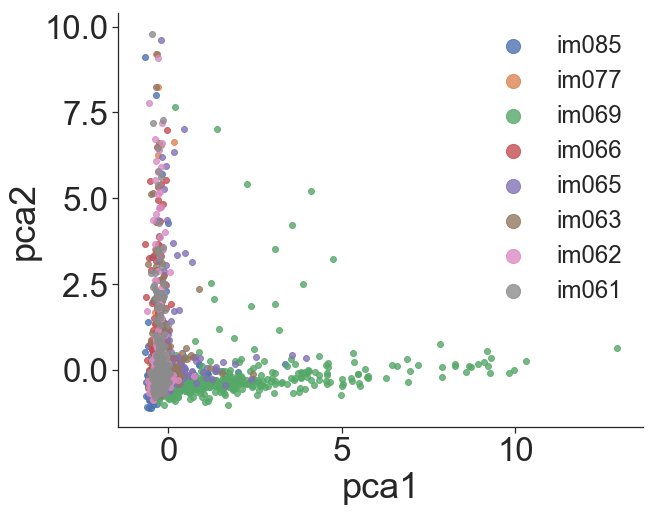

In [90]:
fig = sns.lmplot('pca1','pca2',
           data=flash_df,
           hue='image_name',
           hue_order=sorted(flash_df['image_name'].unique(),reverse=True),
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
        )

plt.legend(frameon=False, loc='upper right', fontsize=24)  # , bbox_to_anchor=(1.35, 0.5)) # , bbox_to_anchor=(1.35, 0.5))

for lh in fig.ax.get_legend().legendHandles:
    lh.set_sizes([200])

# save figure
fig.savefig('figures/exp_image_pca_new.png', dpi=300, bbox_inches='tight')

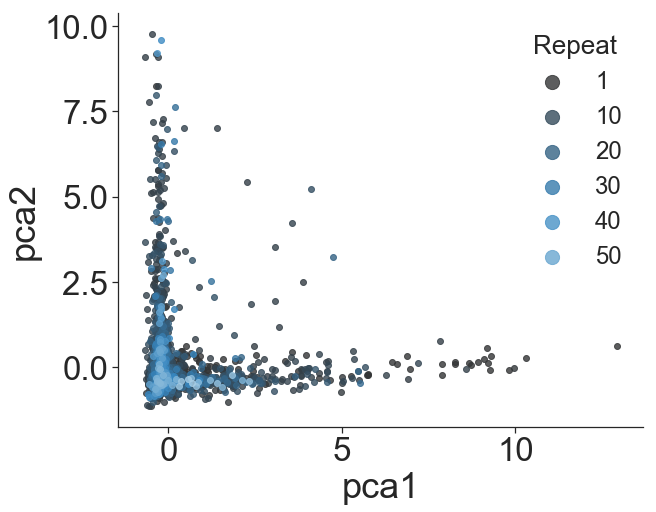

In [91]:
fig = sns.lmplot('pca1','pca2',
           data=flash_df,
           hue='repeat',
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
           palette='Blues_d',
          )

handles, labels = fig.ax.get_legend_handles_labels()            

idx = np.array([0]+range(9,50,10))
handles = [handles[i] for i in idx]
labels = [labels[i] for i in idx]
plt.legend(handles, labels, title='Repeat', frameon=False, loc='upper right', fontsize=24)  # , bbox_to_anchor=(1.35, 0.5))

fig.ax.get_legend().get_title().set_fontsize(26) #legend 'Title' fontsize
for lh in fig.ax.get_legend().legendHandles:
    lh.set_sizes([200])


# save figure
fig.savefig('figures/exp_repeat_pca_new.png', dpi=300, bbox_inches='tight')

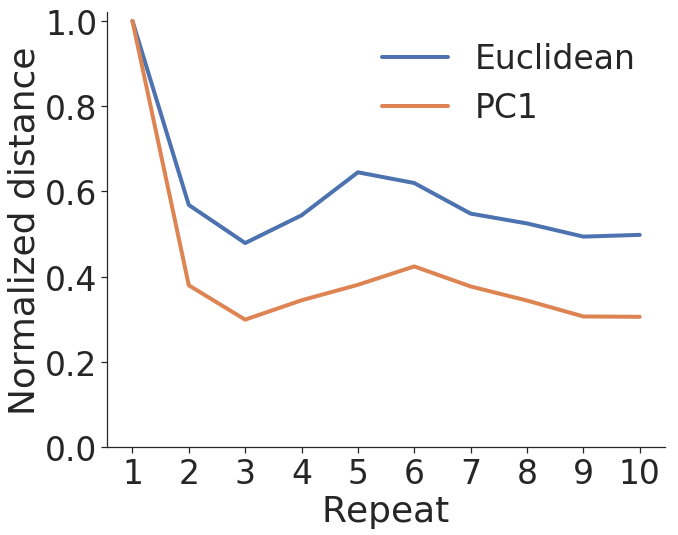

In [14]:
sns.set(font_scale = 3, context='notebook')
sns.set_style('white', {'xtick.bottom': True, 'ytick.left': True})

fig, ax = plt.subplots(1,1, figsize=(10,8))
euclidean_distance = flash_df.groupby('repeat')['distance'].mean().values[:10]
pca1_distance = flash_df.groupby('repeat')['pca1_distance'].mean().values[:10]

ax.plot(np.arange(1,11), euclidean_distance / euclidean_distance.max(), linewidth=4)
ax.plot(np.arange(1,11), pca1_distance / pca1_distance.max(), linewidth=4)

ax.set_ylim([0, 1.02])
ax.set_xticks(np.arange(1, 11))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Repeat')
ax.set_ylabel('Normalized distance')

plt.legend(['Euclidean', 'PC1'], frameon=False)

# save figure
plt.savefig('figures/exp_distance.png', dpi=300, bbox_inches='tight')

# LDA

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

In [93]:
lda = LinearDiscriminantAnalysis(n_components=num_cells)
le = LabelEncoder()

In [94]:
le.fit(fdf_select.image_name.values.reshape(-1, num_cells)[:,0])
X_lda = lda.fit(cell_flash, le.transform(fdf_select.image_name.values.reshape(-1, num_cells)[:,0])).transform(cell_flash)

In [95]:
flash_df = fdf_select.loc[fdf_select.cell_specimen_id==fdf_select.cell_specimen_id.unique()[0], ['image_name', 'experiment_id', 'repeat', 'trial_type']]

for comp in range(2):
    flash_df['pca'+str(comp+1)] = X_lda[:,comp]
    
# distance based on all PCs
flash_df['pca_distance'] = np.linalg.norm(flash_df.loc[:, flash_df.columns[4:]].values, axis=1)
# Euclidean distance
flash_df['distance'] = np.linalg.norm(cell_flash, axis=1)
# just first PC
flash_df['pca1_distance'] = np.abs(flash_df.loc[:, flash_df.columns[4]].values)

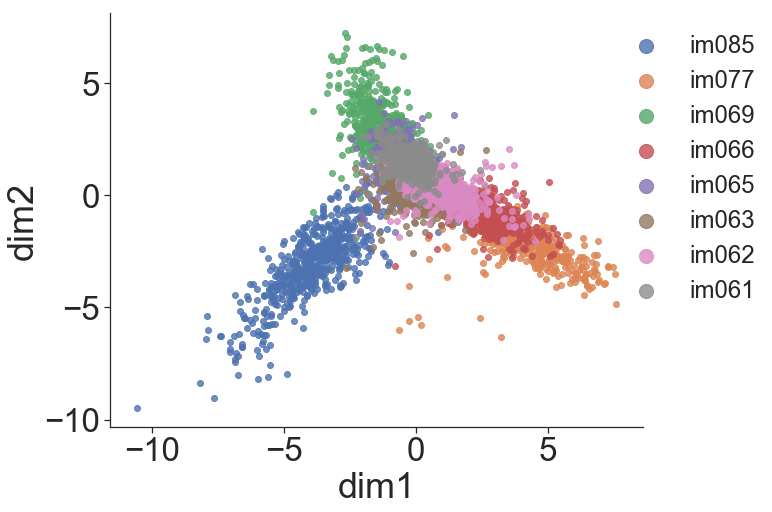

In [108]:
fig = sns.lmplot('pca1','pca2',
           data=flash_df,
           hue='image_name',
           hue_order=sorted(flash_df['image_name'].unique(),reverse=True),
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
        )

plt.xlabel('dim1')
plt.ylabel('dim2')
plt.legend(frameon=False, loc='upper right', fontsize=24, bbox_to_anchor=(1.25, 1.0)) # , bbox_to_anchor=(1.35, 0.5))

for lh in fig.ax.get_legend().legendHandles:
    lh.set_sizes([200])

# save figure
fig.savefig('experiment_image_lda_new.png', dpi=300, bbox_inches='tight')

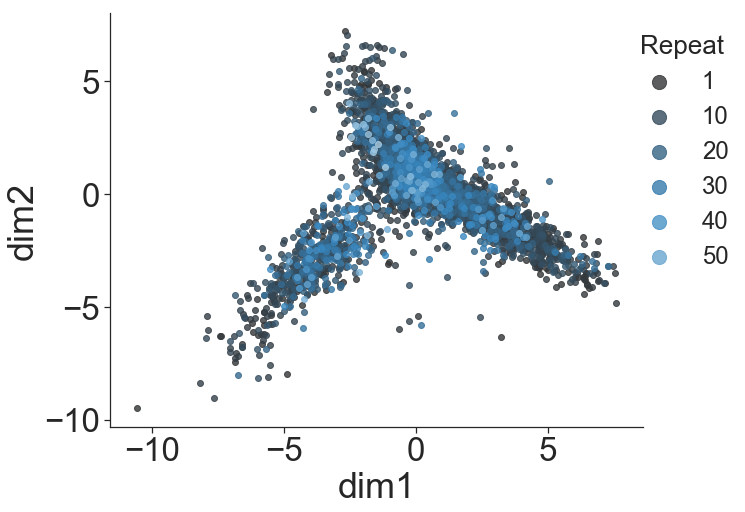

In [109]:
fig = sns.lmplot('pca1','pca2',
           data=flash_df,
           hue='repeat',
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
           palette='Blues_d',
          )

plt.xlabel('dim1')
plt.ylabel('dim2')
handles, labels = fig.ax.get_legend_handles_labels()            

idx = np.array([0]+range(9,50,10))
handles = [handles[i] for i in idx]
labels = [labels[i] for i in idx]
plt.legend(handles, labels, title='Repeat', frameon=False, loc='upper right', fontsize=24, bbox_to_anchor=(1.2, 1.0))  # , bbox_to_anchor=(1.35, 0.5))

fig.ax.get_legend().get_title().set_fontsize(26) #legend 'Title' fontsize
for lh in fig.ax.get_legend().legendHandles:
    lh.set_sizes([200])

# save figure
fig.savefig('experiment_repeat_lda_new.png', dpi=300, bbox_inches='tight')

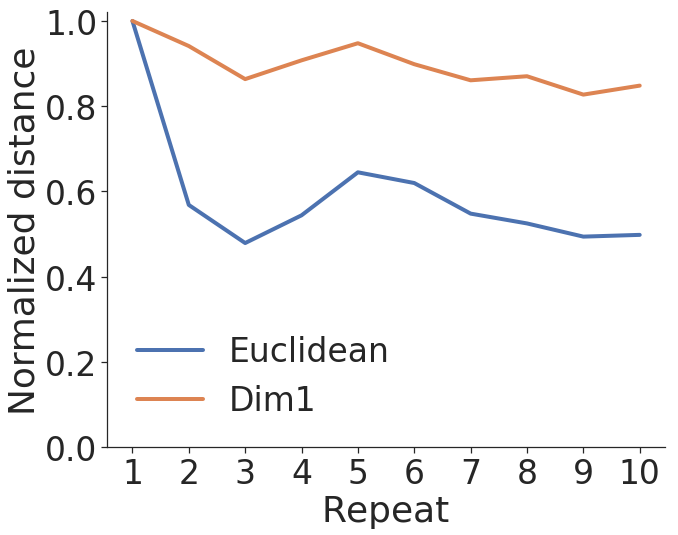

In [20]:
sns.set(font_scale = 3, context='notebook')
sns.set_style('white', {'xtick.bottom': True, 'ytick.left': True})

fig, ax = plt.subplots(1,1, figsize=(10,8))

euclidean_distance = flash_df.groupby('repeat')['distance'].mean().values[:10]
pca1_distance = flash_df.groupby('repeat')['pca1_distance'].mean().values[:10]

ax.plot(np.arange(1,11), euclidean_distance / euclidean_distance.max(), linewidth=4)
ax.plot(np.arange(1,11), pca1_distance / pca1_distance.max(), linewidth=4)

ax.set_ylim([0, 1.02])
ax.set_xticks(np.arange(1, 11))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Repeat')
ax.set_ylabel('Normalized distance')
plt.legend(['Euclidean', 'Dim1'], frameon=False)

# save figure
plt.savefig('experiment_distance_lda.png', dpi=300, bbox_inches='tight')

## Isomap

In [110]:
from sklearn.manifold import Isomap

### First use some PCA to reduce noise

In [111]:
dim_reduce = PCA(n_components=num_cells, whiten=True)  # whiten here?
dim_reduce.fit(cell_flash)
X_pca = dim_reduce.transform(cell_flash)

# use 95% variance cutoff threshold
variance_threshold = 0.95
num_components = np.argwhere(np.cumsum(dim_reduce.explained_variance_ratio_)>=variance_threshold)[0]

In [112]:
flash_df = fdf_select.loc[fdf_select.cell_specimen_id==fdf_select.cell_specimen_id.unique()[0], ['image_name', 'experiment_id', 'repeat', 'trial_type']]

for comp in range(num_components):
    flash_df['pca'+str(comp+1)] = X_pca[:,comp]

In [113]:
# Choose the PCs that explain 95% variance and do MDS on those...
cell_flash_reduced = flash_df.loc[:, flash_df.columns[4:(4+num_components[0])]].values

In [114]:
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(cell_flash_reduced)

In [115]:
flash_df = fdf_select.loc[fdf_select.cell_specimen_id==fdf_select.cell_specimen_id.unique()[0], ['image_name', 'experiment_id', 'repeat']]
flash_df['dim1'] = X_transformed[:,0]
flash_df['dim2'] = X_transformed[:,1]

flash_df['distance'] = np.linalg.norm(cell_flash, axis=1)
flash_df['pca_distance'] = np.linalg.norm(X_transformed, axis=1)
flash_df['pca1_distance'] = np.abs(X_transformed[:,0])

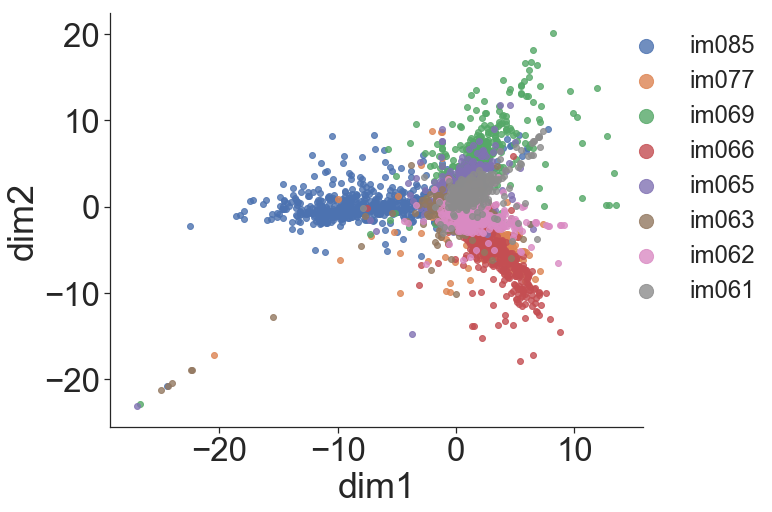

In [121]:
fig = sns.lmplot('dim1','dim2',
           data=flash_df,
           hue='image_name',
           hue_order=sorted(flash_df['image_name'].unique(),reverse=True),
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
        )

plt.legend(frameon=False, loc='upper right', fontsize=24, bbox_to_anchor=(1.25, 1.0)) # , bbox_to_anchor=(1.35, 0.5))

for lh in fig.ax.get_legend().legendHandles:
    lh.set_sizes([200])

# save figure
fig.savefig('experiment_image_isomap_new.png', dpi=300, bbox_inches='tight')

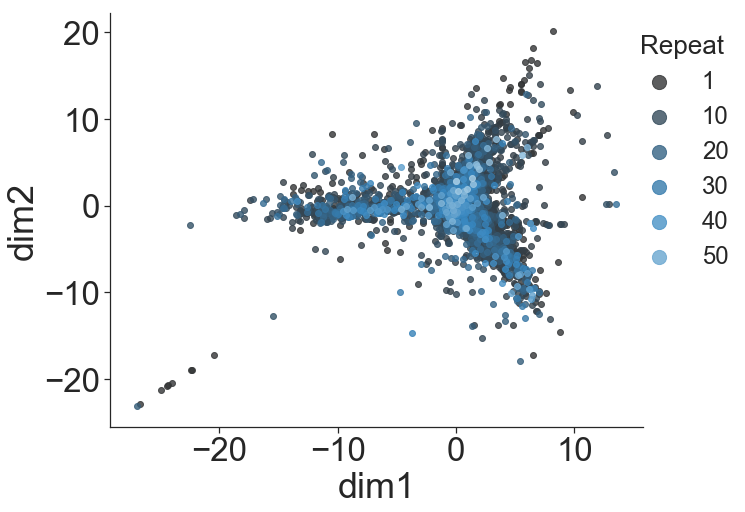

In [122]:
fig = sns.lmplot('dim1','dim2',
           data=flash_df,
           hue='repeat',
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
           palette='Blues_d',
          )

handles, labels = fig.ax.get_legend_handles_labels()            

idx = np.array([0]+range(9,50,10))
handles = [handles[i] for i in idx]
labels = [labels[i] for i in idx]
plt.legend(handles, labels, title='Repeat', frameon=False, loc='upper right', fontsize=24, bbox_to_anchor=(1.2, 1.0))  # , bbox_to_anchor=(1.35, 0.5))

fig.ax.get_legend().get_title().set_fontsize(26) #legend 'Title' fontsize
for lh in fig.ax.get_legend().legendHandles:
    lh.set_sizes([200])

# save figure
fig.savefig('experiment_repeat_isomap_new.png', dpi=300, bbox_inches='tight')

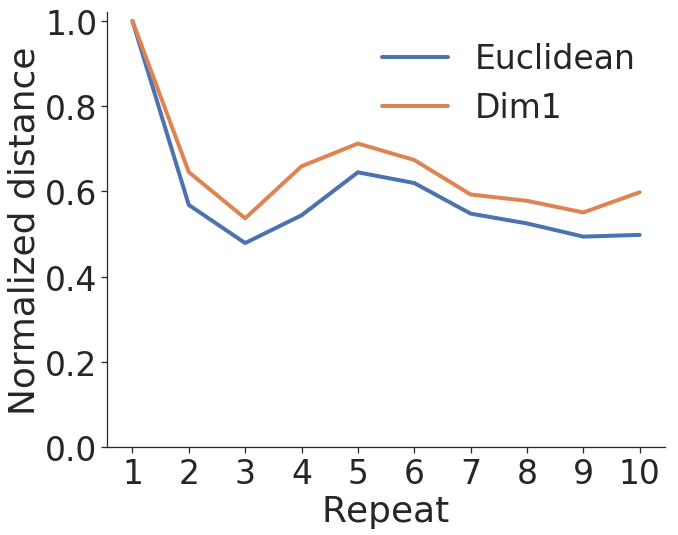

In [31]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
euclidean_distance = flash_df.groupby('repeat')['distance'].mean().values[:10]
pca1_distance = flash_df.groupby('repeat')['pca1_distance'].mean().values[:10]

ax.plot(np.arange(1,11), euclidean_distance / euclidean_distance.max(), linewidth=4)
ax.plot(np.arange(1,11), pca1_distance / pca1_distance.max(), linewidth=4)

ax.set_ylim([0, 1.02])
ax.set_xticks(np.arange(1, 11))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Repeat')
ax.set_ylabel('Normalized distance')
plt.legend(['Euclidean', 'Dim1'], frameon=False)

# save figure
plt.savefig('experiment_distance_isomap.png', dpi=300, bbox_inches='tight')

# Model results - STPNet

In [123]:
model = 'STSPNet'
model_data = pickle.load(open(model_dir+'/'+model+'/'+'STSPNet_A_1.pkl', 'rb'))

In [124]:
model_labels = model_data['labels']

# store number of repeats
n_reps = np.zeros_like(model_labels[:, ::3]).squeeze()

# iterate over batches
for b in range(model_labels.shape[0]):
    cnt = -1
    # iterate over flashes
    for i, label in enumerate(model_labels[b, ::3]):
        cnt+=1
        if label==1:
            cnt=0
        n_reps[b, i] = cnt
        
n_reps += 1

In [125]:
data = model_data['input']  # choose either input layer or hidden layer
num_cells = data.shape[2]

# Get cell flashes (ignore initial set of flashes)
cell_flash = data[:, 12::3].reshape(-1, num_cells)

# remove omitted flashes
img_model = model_data['image'][:, 12::3].flatten()
cell_flash = cell_flash[img_model!=8]

# first remove first 12 flashes, then omitted flashes
n_reps = n_reps[:, 4:].flatten()
n_reps = n_reps[img_model!=8]

# remove omitted flashes
img_model = img_model[img_model!=8]

In [126]:
# Define mapping between image index and image label
stim_dict_new = {0: 'im077', 1: 'im062', 2: 'im066', 3: 'im063', 4: 'im065', 5: 'im069', 6: 'im085', 7: 'im061', 8: 'blank'}

# PCA

In [127]:
pca = PCA(n_components=num_cells)

X_pca = pca.fit(cell_flash).transform(cell_flash)

model_df = pd.DataFrame({'image_name': [stim_dict_new[item] for item in img_model], 'repeat': n_reps})
for comp in range(3):
    model_df['pca'+str(comp+1)] = X_pca[:,comp]
    
model_df['pca_distance'] = np.linalg.norm(model_df.loc[:, model_df.columns[2:]].values, axis=1)
model_df['distance'] = np.linalg.norm(cell_flash, axis=1)
model_df['pca1_distance'] = np.abs(model_df.loc[:, model_df.columns[2]].values)

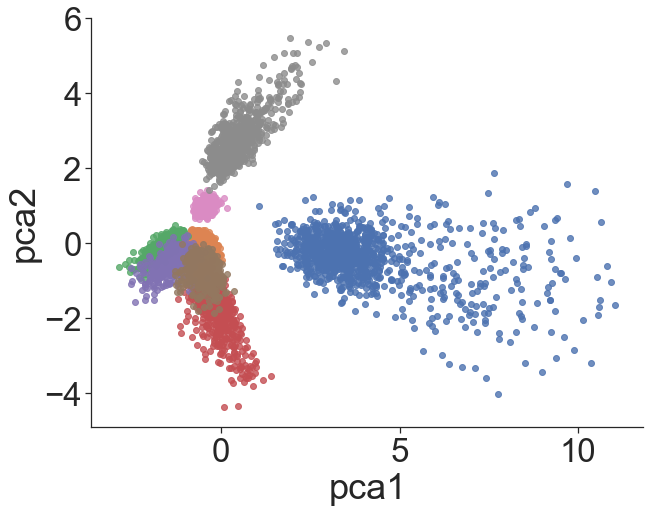

In [129]:
fig = sns.lmplot('pca1','pca2',
           data=model_df,
           hue='image_name',
           hue_order=sorted(model_df['image_name'].unique(),reverse=True),
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
        )

# plt.legend(frameon=False, loc='right', bbox_to_anchor=(1.35, 0.5))

# save figure
fig.savefig('figures/stpnet_image_pca_new.png', dpi=300, bbox_inches='tight')

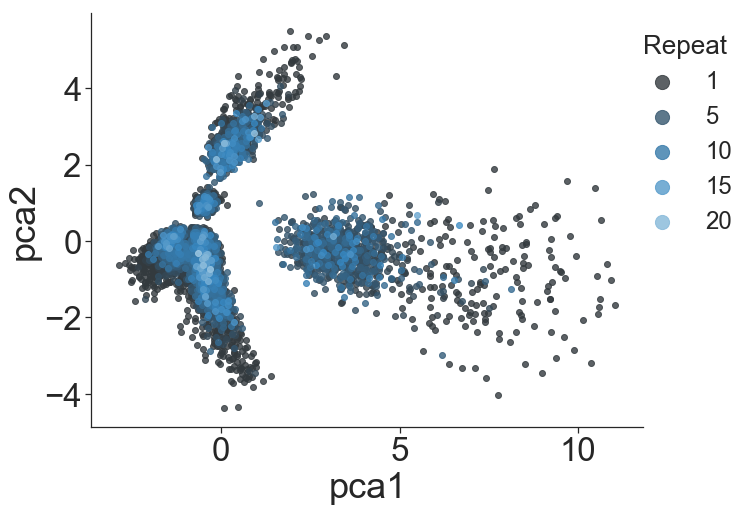

In [131]:
fig = sns.lmplot('pca1','pca2',
           data=model_df,
           hue='repeat',
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
           palette='Blues_d',
          )

handles, labels = fig.ax.get_legend_handles_labels()            

idx = np.array([0]+range(4,20,5))
handles = [handles[i] for i in idx]
labels = [int(float(labels[i])) for i in idx]
plt.legend(handles, labels, title='Repeat', frameon=False, loc='upper right', fontsize=24, bbox_to_anchor=(1.2, 1.0))  # , bbox_to_anchor=(1.35, 0.5))

fig.ax.get_legend().get_title().set_fontsize(26) #legend 'Title' fontsize
for lh in fig.ax.get_legend().legendHandles:
    lh.set_sizes([200])

# save figure
fig.savefig('figures/stpnet_repeat_pca_new.png', dpi=300, bbox_inches='tight')

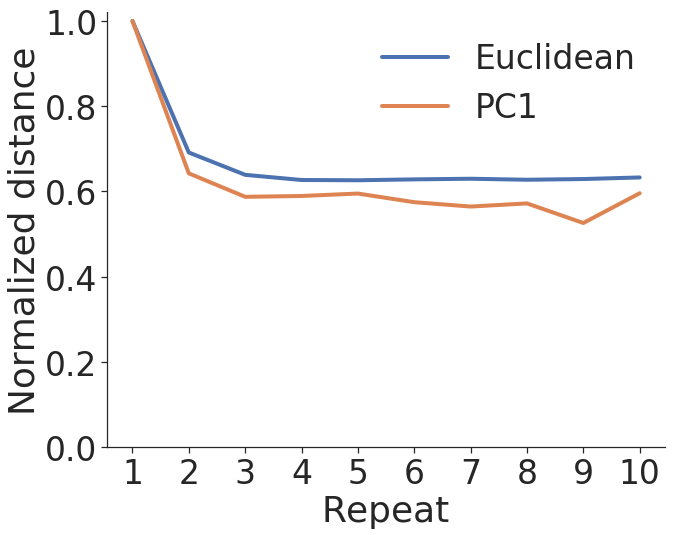

In [32]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

euclidean_distance = model_df.groupby('repeat')['distance'].mean().values[:10]
pca_1_distance = model_df.groupby('repeat')['pca1_distance'].mean().values[:10]

ax.plot(np.arange(1,11), euclidean_distance / euclidean_distance.max(), linewidth=4)
ax.plot(np.arange(1,11), pca_1_distance / pca_1_distance.max(), linewidth=4)

ax.set_ylim([0, 1.02])
ax.set_xticks(np.arange(1, 11))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Repeat')
ax.set_ylabel('Normalized distance')
plt.legend(['Euclidean', 'PC1'], frameon=False)

# save figure
plt.savefig('figures/stpnet_distance.png', dpi=300, bbox_inches='tight')

# LDA

In [132]:
lda = LinearDiscriminantAnalysis(n_components=num_cells)
X_lda = lda.fit(cell_flash, img_model).transform(cell_flash)

model_df = pd.DataFrame({'image_name': [stim_dict_new[item] for item in img_model], 'repeat': n_reps})
for comp in range(7):
    model_df['pca'+str(comp+1)] = X_lda[:,comp]

model_df['pca_distance'] = np.linalg.norm(model_df.loc[:, model_df.columns[2:]].values, axis=1)
model_df['distance'] = np.linalg.norm(cell_flash, axis=1)
model_df['pca1_distance'] = np.abs(model_df.loc[:, model_df.columns[2]].values)

/home/brian/miniconda3/envs/vis-behav/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


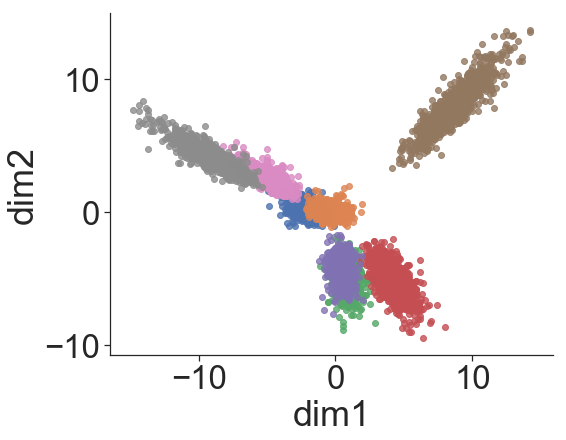

In [134]:
# sns.set_style('white', {'xtick.bottom': True, 'ytick.left': True})
# sns.set_context('notebook', font_scale=2)

fig = sns.lmplot('pca1','pca2',
           data=model_df,
           hue='image_name',
           hue_order=sorted(model_df['image_name'].unique(),reverse=True),
           fit_reg=False,
           legend=False,
           height=7,
           aspect=10./8,
        )

plt.xlabel('dim1')
plt.ylabel('dim2')
# plt.legend(frameon=False, loc='right', bbox_to_anchor=(1.35, 0.5))

# save figure
fig.savefig('stpnet_image_lda_new.png', dpi=300, bbox_inches='tight')

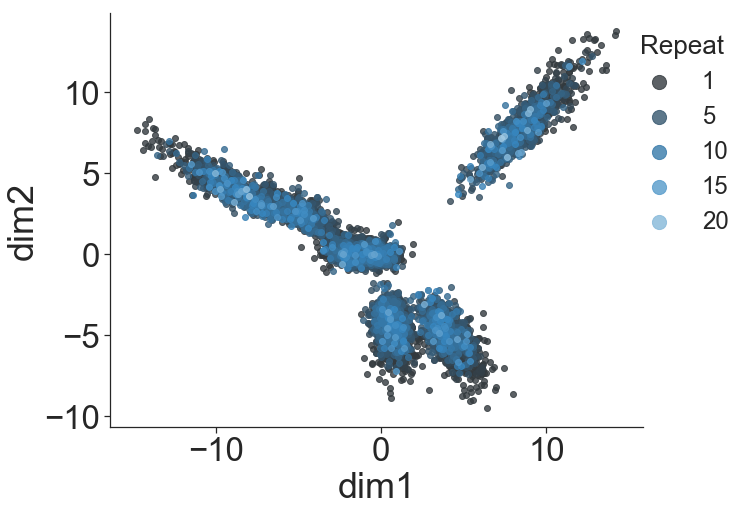

In [136]:
fig = sns.lmplot('pca1','pca2',
           data=model_df,
           hue='repeat',
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
           palette='Blues_d',
          )

plt.xlabel('dim1')
plt.ylabel('dim2')
handles, labels = fig.ax.get_legend_handles_labels()            

idx = np.array([0]+range(4,20,5))
handles = [handles[i] for i in idx]
labels = [int(float(labels[i])) for i in idx]
plt.legend(handles, labels, title='Repeat', frameon=False, loc='upper right', fontsize=24, bbox_to_anchor=(1.2, 1.0))  # , bbox_to_anchor=(1.35, 0.5))

fig.ax.get_legend().get_title().set_fontsize(26) #legend 'Title' fontsize
for lh in fig.ax.get_legend().legendHandles:
    lh.set_sizes([200])

# save figure
fig.savefig('stpnet_repeat_lda_new.png', dpi=300, bbox_inches='tight')

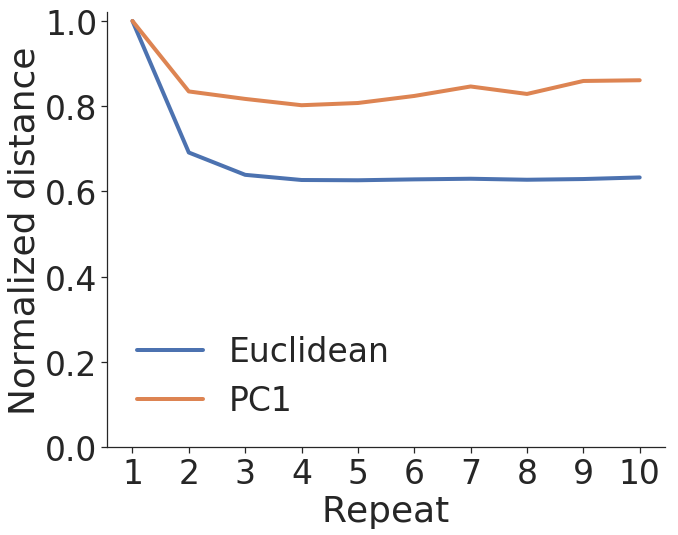

In [34]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

euclidean_distance = model_df.groupby('repeat')['distance'].mean().values[:10]
pca_1_distance = model_df.groupby('repeat')['pca1_distance'].mean().values[:10]

ax.plot(np.arange(1,11), euclidean_distance / euclidean_distance.max(), linewidth=4)
ax.plot(np.arange(1,11), pca_1_distance / pca_1_distance.max(), linewidth=4)

ax.set_ylim([0, 1.02])
ax.set_xticks(np.arange(1, 11))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Repeat')
ax.set_ylabel('Normalized distance')
plt.legend(['Euclidean', 'PC1'], frameon=False)

# save figure
plt.savefig('stpnet_distance_lda.png', dpi=300, bbox_inches='tight')

# Isomap

In [137]:
dim_reduce = PCA(n_components=num_cells, whiten=True)  # whiten here?
dim_reduce.fit(cell_flash)
X_pca = dim_reduce.transform(cell_flash)

# use 95% variance cutoff threshold
variance_threshold = 0.95
num_components = np.argwhere(np.cumsum(dim_reduce.explained_variance_ratio_)>=variance_threshold)[0]

In [138]:
model_df = pd.DataFrame({'image_name': [stim_dict_new[item] for item in img_model], 'repeat': n_reps})
for comp in range(num_components):
    model_df['pca'+str(comp+1)] = X_pca[:,comp]

In [139]:
# Choose the PCs that explain 95% variance and do MDS on those...
cell_flash_reduced = model_df.loc[:, model_df.columns[4:(4+num_components[0])]].values

In [140]:
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(cell_flash_reduced)

In [141]:
model_df = pd.DataFrame({'image_name': [stim_dict_new[item] for item in img_model], 'repeat': n_reps})
model_df['dim1'] = X_transformed[:,0]
model_df['dim2'] = X_transformed[:,1]

model_df['distance'] = np.linalg.norm(cell_flash, axis=1)
model_df['pca_distance'] = np.linalg.norm(X_transformed, axis=1)
model_df['pca1_distance'] = np.abs(X_transformed[:,0])

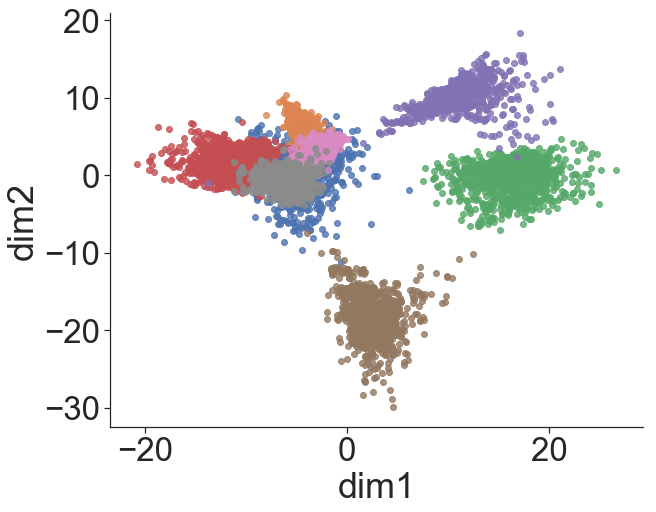

In [143]:
fig = sns.lmplot('dim1','dim2',
           data=model_df,
           hue='image_name',
           hue_order=sorted(model_df['image_name'].unique(),reverse=True),
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
        )

# plt.legend(frameon=False, loc='right', bbox_to_anchor=(1.35, 0.5))

# save figure
fig.savefig('stpnet_image_isomap_new.png', dpi=300, bbox_inches='tight')

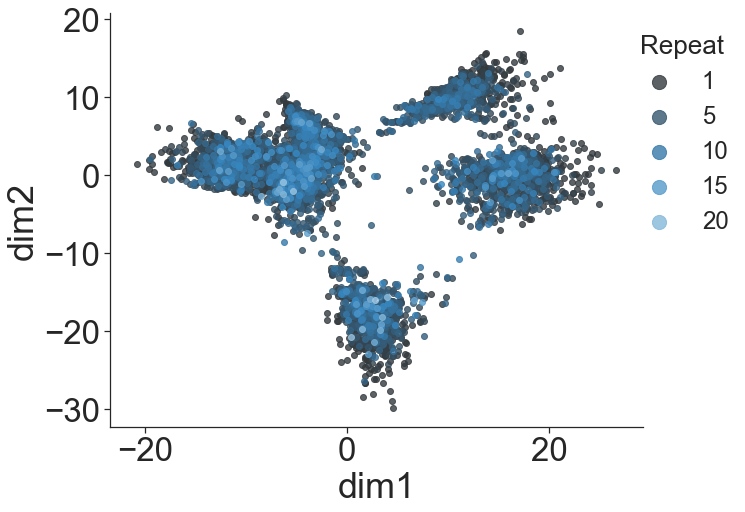

In [145]:
fig = sns.lmplot('dim1','dim2',
           data=model_df,
           hue='repeat',
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
           palette='Blues_d',
          )

handles, labels = fig.ax.get_legend_handles_labels()            

idx = np.array([0]+range(4,20,5))
handles = [handles[i] for i in idx]
labels = [int(float(labels[i])) for i in idx]
plt.legend(handles, labels, title='Repeat', frameon=False, loc='upper right', fontsize=24, bbox_to_anchor=(1.2, 1.0))  # , bbox_to_anchor=(1.35, 0.5))

fig.ax.get_legend().get_title().set_fontsize(26) #legend 'Title' fontsize
for lh in fig.ax.get_legend().legendHandles:
    lh.set_sizes([200])

# save figure
fig.savefig('stpnet_repeat_isomap_new.png', dpi=300, bbox_inches='tight')

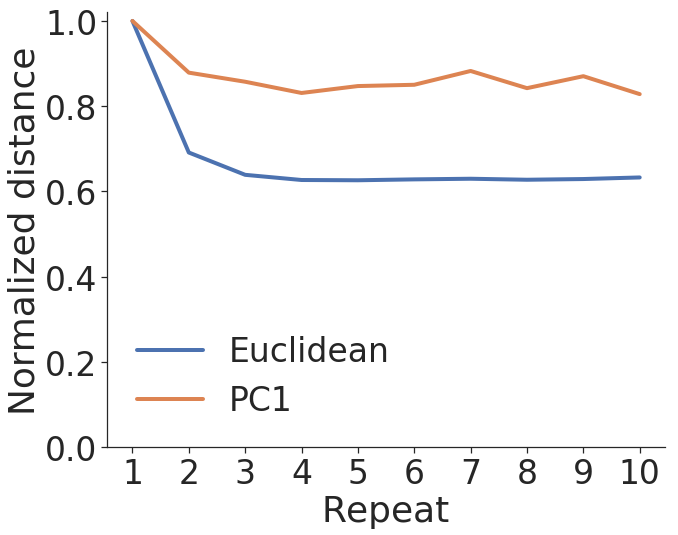

In [40]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
euclidean_distance = model_df.groupby('repeat')['distance'].mean().values[:10]
pca1_distance = model_df.groupby('repeat')['pca1_distance'].mean().values[:10]

ax.plot(np.arange(1,11), euclidean_distance / euclidean_distance.max(), linewidth=4)
ax.plot(np.arange(1,11), pca1_distance / pca1_distance.max(), linewidth=4)

ax.set_ylim([0, 1.02])
ax.set_xticks(np.arange(1, 11))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Repeat')
ax.set_ylabel('Normalized distance')
plt.legend(['Euclidean', 'PC1'], frameon=False)

# save figure
plt.savefig('stpnet_distance_isomap.png', dpi=300, bbox_inches='tight')

---

# Model results - RNN

In [164]:
model = 'RNN'
model_data = pickle.load(open(model_dir+'/'+model+'/'+'RNN_A_1.pkl', 'rb'))

In [165]:
model_labels = model_data['labels']

# store number of repeats
n_reps = np.zeros_like(model_labels[:, ::3]).squeeze()

# iterate over batches
for b in range(model_labels.shape[0]):
    cnt = -1
    # iterate over flashes
    for i, label in enumerate(model_labels[b, ::3]):
        cnt+=1
        if label==1:
            cnt=0
        n_reps[b, i] = cnt
        
n_reps += 1

In [166]:
data = model_data['input']  # choose either input layer or hidden layer
num_cells = data.shape[2]

# Get cell flashes (ignore initial set of flashes)
cell_flash = data[:, 12::3].reshape(-1, num_cells)

# remove omitted flashes
img_model = model_data['image'][:, 12::3].flatten()
cell_flash = cell_flash[img_model!=8]

# first remove first 12 flashes, then omitted flashes
n_reps = n_reps[:, 4:].flatten()
n_reps = n_reps[img_model!=8]

# remove omitted flashes
img_model = img_model[img_model!=8]

# PCA

In [170]:
pca = PCA(n_components=num_cells)

X_pca = pca.fit(cell_flash).transform(cell_flash)

model_df = pd.DataFrame({'image_name': [stim_dict_new[item] for item in img_model], 'repeat': n_reps})
for comp in range(3):
    model_df['pca'+str(comp+1)] = X_pca[:,comp]
    
# Convert repeat to int
model_df['repeat'] = model_df['repeat'].astype('int')
    
model_df['pca_distance'] = np.linalg.norm(model_df.loc[:, model_df.columns[2:]].values, axis=1)
model_df['distance'] = np.linalg.norm(cell_flash, axis=1)
model_df['pca1_distance'] = np.abs(model_df.loc[:, model_df.columns[2]].values)

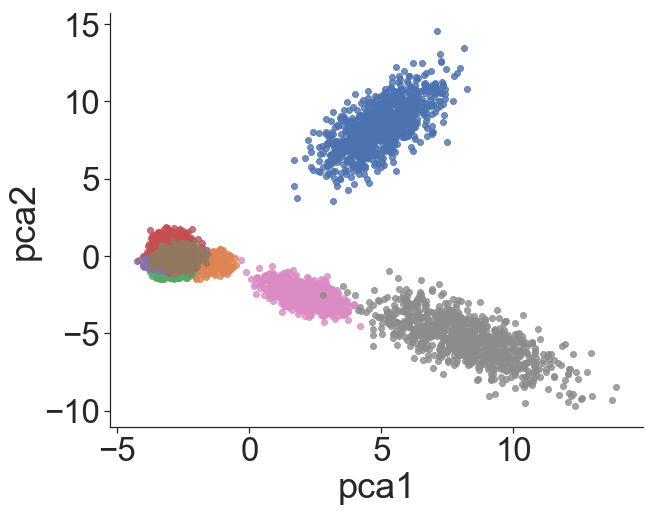

In [151]:
fig = sns.lmplot('pca1','pca2',
           data=model_df,
           hue='image_name',
           hue_order=sorted(model_df['image_name'].unique(),reverse=True),
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
        )

# plt.legend(frameon=False, loc='right', bbox_to_anchor=(1.35, 0.5))

# save figure
fig.savefig('figures/rnn_image_pca_new.png', dpi=300, bbox_inches='tight')

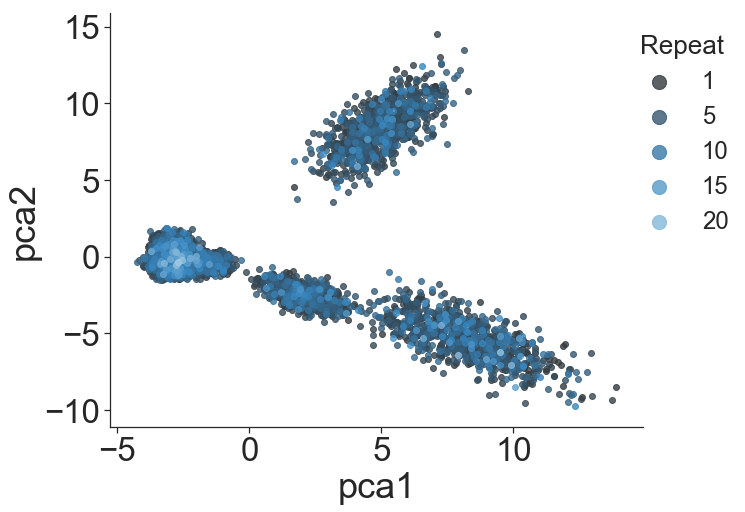

In [172]:
fig = sns.lmplot('pca1','pca2',
           data=model_df,
           hue='repeat',
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
           palette='Blues_d',
          )

handles, labels = fig.ax.get_legend_handles_labels()            

idx = np.array([0]+range(4,20,5))
handles = [handles[i] for i in idx]
labels = [labels[i] for i in idx]
plt.legend(handles, labels, title='Repeat', frameon=False, loc='upper right', fontsize=24, bbox_to_anchor=(1.2, 1.0))  # , bbox_to_anchor=(1.35, 0.5))

fig.ax.get_legend().get_title().set_fontsize(26) #legend 'Title' fontsize
for lh in fig.ax.get_legend().legendHandles:
    lh.set_sizes([200])

# save figure
fig.savefig('figures/rnn_repeat_pca_new.png', dpi=300, bbox_inches='tight')

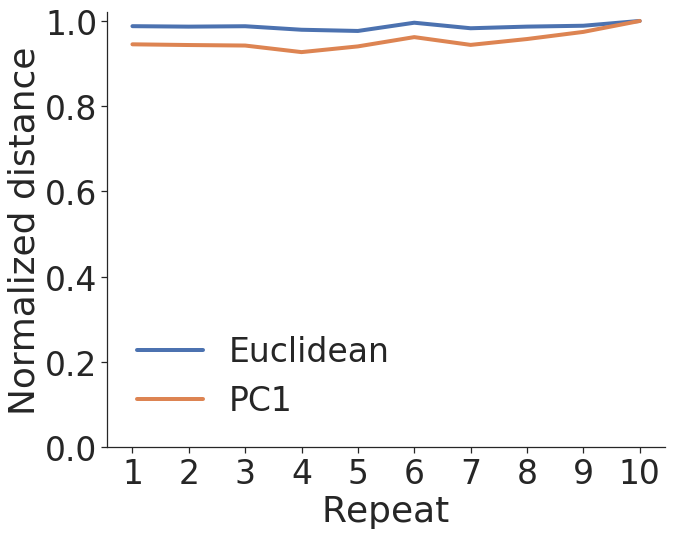

In [45]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

euclidean_distance = model_df.groupby('repeat')['distance'].mean().values[:10]
pca_1_distance = model_df.groupby('repeat')['pca1_distance'].mean().values[:10]

ax.plot(np.arange(1,11), euclidean_distance / euclidean_distance.max(), linewidth=4)
ax.plot(np.arange(1,11), pca_1_distance / pca_1_distance.max(), linewidth=4)

ax.set_ylim([0, 1.02])
ax.set_xticks(np.arange(1, 11))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Repeat')
ax.set_ylabel('Normalized distance')
plt.legend(['Euclidean', 'PC1'], frameon=False)

# save figure
plt.savefig('figures/rnn_distance.png', dpi=300, bbox_inches='tight')

# LDA

In [173]:
lda = LinearDiscriminantAnalysis(n_components=num_cells)
X_lda = lda.fit(cell_flash, img_model).transform(cell_flash)

model_df = pd.DataFrame({'image_name': [stim_dict_new[item] for item in img_model], 'repeat': n_reps})
for comp in range(7):
    model_df['pca'+str(comp+1)] = X_lda[:,comp]

model_df['pca_distance'] = np.linalg.norm(model_df.loc[:, model_df.columns[2:]].values, axis=1)
model_df['distance'] = np.linalg.norm(cell_flash, axis=1)
model_df['pca1_distance'] = np.abs(model_df.loc[:, model_df.columns[2]].values)

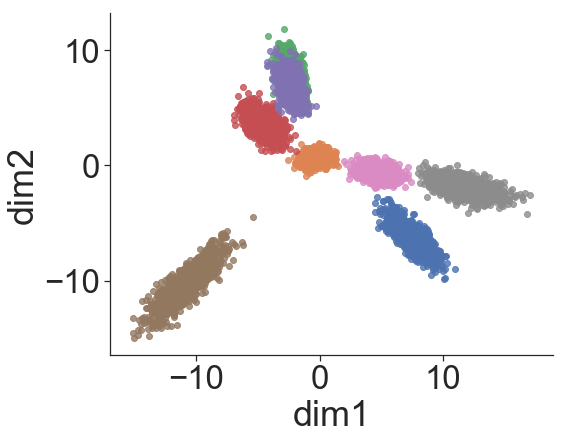

In [174]:
fig = sns.lmplot('pca1','pca2',
           data=model_df,
           hue='image_name',
           hue_order=sorted(model_df['image_name'].unique(),reverse=True),
           fit_reg=False,
           legend=False,
           height=7,
           aspect=10./8,
        )

plt.xlabel('dim1')
plt.ylabel('dim2')
# plt.legend(frameon=False, loc='right', bbox_to_anchor=(1.35, 0.5))

# save figure
fig.savefig('rnn_image_lda_new.png', dpi=300, bbox_inches='tight')

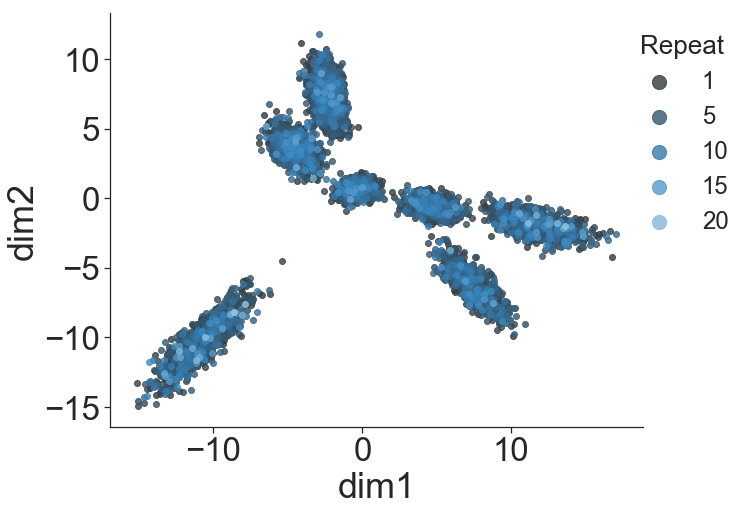

In [176]:
fig = sns.lmplot('pca1','pca2',
           data=model_df,
           hue='repeat',
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
           palette='Blues_d',
          )

plt.xlabel('dim1')
plt.ylabel('dim2')
# handles, labels = fig.ax.get_legend_handles_labels()            

# idx = np.array([0]+range(4,20,5))
# handles = [handles[i] for i in idx]
# labels = [labels[i] for i in idx]
plt.legend(handles, labels, title='Repeat', frameon=False, loc='upper right', fontsize=24, bbox_to_anchor=(1.2, 1.0))  # , bbox_to_anchor=(1.35, 0.5))

fig.ax.get_legend().get_title().set_fontsize(26) #legend 'Title' fontsize
for lh in fig.ax.get_legend().legendHandles:
    lh.set_sizes([200])

# save figure
fig.savefig('rnn_repeat_lda_new.png', dpi=300, bbox_inches='tight')

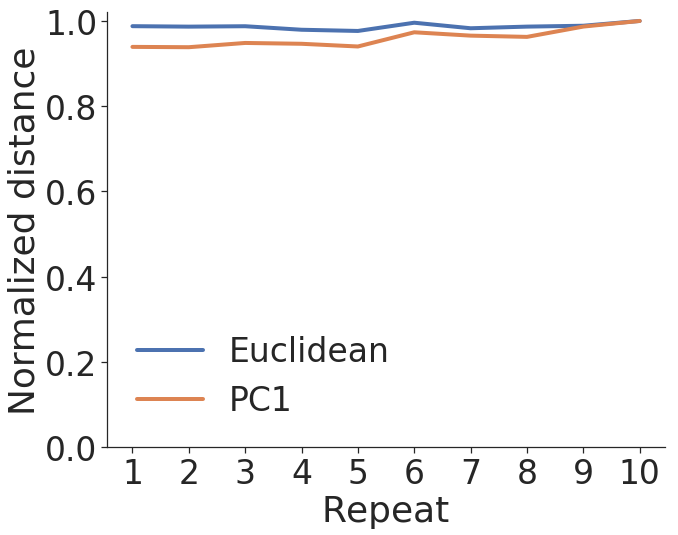

In [47]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

euclidean_distance = model_df.groupby('repeat')['distance'].mean().values[:10]
pca_1_distance = model_df.groupby('repeat')['pca1_distance'].mean().values[:10]

ax.plot(np.arange(1,11), euclidean_distance / euclidean_distance.max(), linewidth=4)
ax.plot(np.arange(1,11), pca_1_distance / pca_1_distance.max(), linewidth=4)

ax.set_ylim([0, 1.02])
ax.set_xticks(np.arange(1, 11))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Repeat')
ax.set_ylabel('Normalized distance')
plt.legend(['Euclidean', 'PC1'], frameon=False)

# save figure
plt.savefig('rnn_distance_lda.png', dpi=300, bbox_inches='tight')

# Isomap

In [177]:
dim_reduce = PCA(n_components=num_cells, whiten=True)  # whiten here?
dim_reduce.fit(cell_flash)
X_pca = dim_reduce.transform(cell_flash)

# use 95% variance cutoff threshold
variance_threshold = 0.95
num_components = np.argwhere(np.cumsum(dim_reduce.explained_variance_ratio_)>=variance_threshold)[0]

In [178]:
model_df = pd.DataFrame({'image_name': [stim_dict_new[item] for item in img_model], 'repeat': n_reps})
for comp in range(num_components):
    model_df['pca'+str(comp+1)] = X_pca[:,comp]

In [179]:
# Choose the PCs that explain 95% variance and do MDS on those...
cell_flash_reduced = model_df.loc[:, model_df.columns[4:(4+num_components[0])]].values

In [180]:
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(cell_flash_reduced)

In [181]:
model_df = pd.DataFrame({'image_name': [stim_dict_new[item] for item in img_model], 'repeat': n_reps})
model_df['dim1'] = X_transformed[:,0]
model_df['dim2'] = X_transformed[:,1]

model_df['distance'] = np.linalg.norm(cell_flash, axis=1)
model_df['pca_distance'] = np.linalg.norm(X_transformed, axis=1)
model_df['pca1_distance'] = np.abs(X_transformed[:,0])

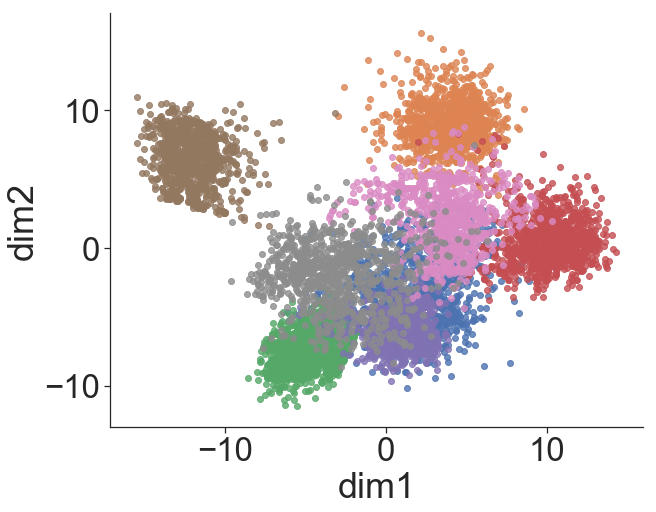

In [182]:
fig = sns.lmplot('dim1','dim2',
           data=model_df,
           hue='image_name',
           hue_order=sorted(model_df['image_name'].unique(),reverse=True),
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
        )

# plt.legend(frameon=False, loc='right', bbox_to_anchor=(1.35, 0.5))

# save figure
fig.savefig('rnn_image_isomap_new.png', dpi=300, bbox_inches='tight')

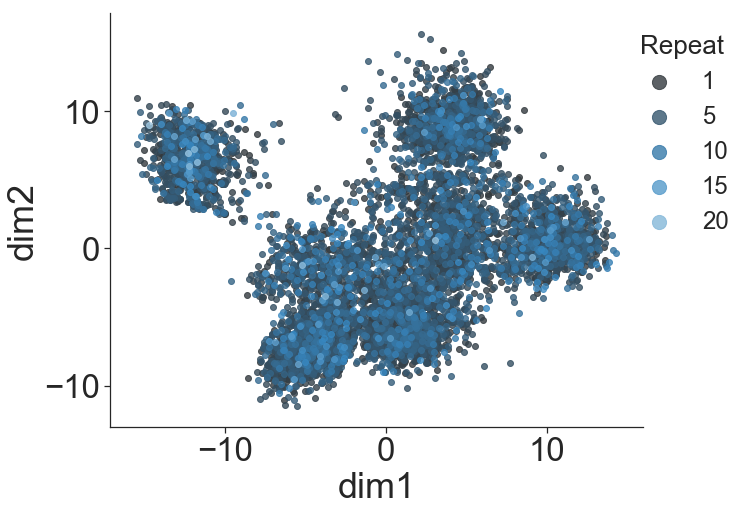

In [184]:
fig = sns.lmplot('dim1','dim2',
           data=model_df,
           hue='repeat',
           fit_reg=False,
           legend=False,
           height=8,
           aspect=10./8,
           palette='Blues_d',
          )

# handles, labels = fig.ax.get_legend_handles_labels()            

# idx = np.array([0]+range(4,20,5))
# handles = [handles[i] for i in idx]
# labels = [labels[i] for i in idx]
plt.legend(handles, labels, title='Repeat', frameon=False, loc='upper right', fontsize=24, bbox_to_anchor=(1.2, 1.0))  # , bbox_to_anchor=(1.35, 0.5))

fig.ax.get_legend().get_title().set_fontsize(26) #legend 'Title' fontsize
for lh in fig.ax.get_legend().legendHandles:
    lh.set_sizes([200])

# save figure
fig.savefig('rnn_repeat_isomap_new.png', dpi=300, bbox_inches='tight')

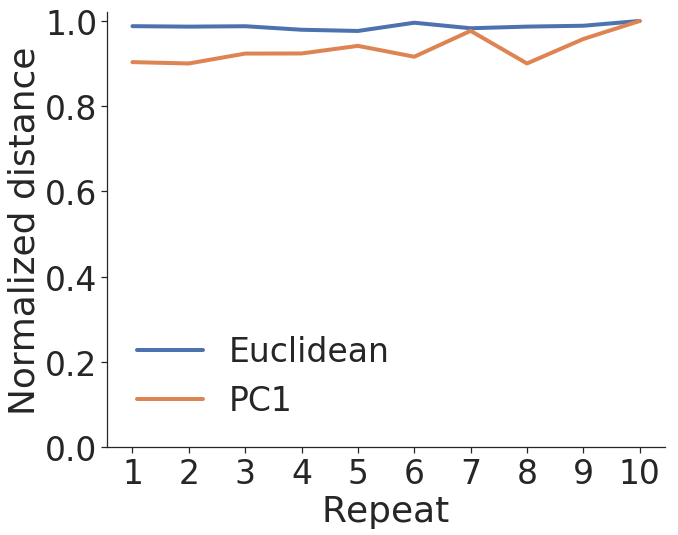

In [53]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
euclidean_distance = model_df.groupby('repeat')['distance'].mean().values[:10]
pca1_distance = model_df.groupby('repeat')['pca1_distance'].mean().values[:10]

ax.plot(np.arange(1,11), euclidean_distance / euclidean_distance.max(), linewidth=4)
ax.plot(np.arange(1,11), pca1_distance / pca1_distance.max(), linewidth=4)

ax.set_ylim([0, 1.02])
ax.set_xticks(np.arange(1, 11))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Repeat')
ax.set_ylabel('Normalized distance')
plt.legend(['Euclidean', 'PC1'], frameon=False)

# save figure
plt.savefig('rnn_distance_isomap.png', dpi=300, bbox_inches='tight')